Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0726
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0693
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0687
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0685
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0684
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0684
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0684
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0683
Epoch 9/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0683
Epoch 10/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0683
Epoch 11/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0683
Epoch 12/20
60000/60000 [===========================

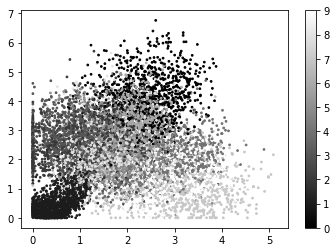

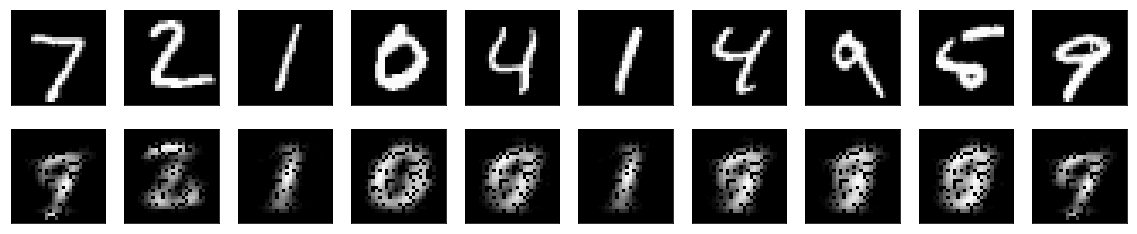

In [31]:
# @Time    : 2018/11/23 13:05
"""
Autoencoder with single hidden layer.
"""
%matplotlib inline
import numpy as np

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

np.random.seed(33)   # random seed，to reproduce results.

ENCODING_DIM_INPUT = 784
ENCODING_DIM_OUTPUT = 2
EPOCHS = 20
BATCH_SIZE = 64

def train(x_train):
    """
    build autoencoder.
    :param x_train:  the train data
    :return: encoder and decoder
    """
    # input placeholder = 784  input_image => (?, 784)
    input_image = Input(shape=(ENCODING_DIM_INPUT, ))

    # encoding layer 2
    hidden_layer = Dense(ENCODING_DIM_OUTPUT, activation='relu')(input_image)
    # decoding layer = 784
    decode_output = Dense(ENCODING_DIM_INPUT, activation='relu')(hidden_layer)
    # decode_output => (? 784)
    # build autoencoder, encoder, decoder
    #input_image.shape = (?, 784)
    #input_image[0] = Tensor("strided_slice:0", shape=(784,), dtype=float32)
    autoencoder = Model(inputs=input_image, outputs=decode_output)
    
    encoder = Model(inputs=input_image, outputs=hidden_layer)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder

def plotRepresentation(encode_images, y_test):
    """
    plot the hidden result.
    :param encode_images: the images after encoding
    :param y_test: the label.
    :return:
    """
    # test and plot
    plt.scatter(encode_images[:, 0], encode_images[:, 1], c=y_test, s=3)
    plt.colorbar()
    plt.show()

def showImages(decode_images, x_test):
    """
    plot the images.
    :param decode_images: the images after decoding
    :param x_test: testing data
    :return:
    """
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

if __name__ == '__main__':
    # Step1： load data  x_train: (60000, 28, 28), y_train: (60000,) x_test: (10000, 28, 28), y_test: (10000,)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Step2: normalize
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 784), x_test: (10000, 784), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Step4： train
    encoder, autoencoder = train(x_train=x_train)

    # test and plot
    encode_images = encoder.predict(x_test)
    plotRepresentation(encode_images, y_test)

    # show images
    decode_images = autoencoder.predict(x_test)
    showImages(decode_images, x_test)

### 编码器简单架构图

28x28 => 784 => 2 => 784 => 28x28

<img src='pic/0.png'>

* Encoder层输出结果可视化

<img src='pic/1.png'>

* Autoencoder生成图片和原图片对比

<img src='pic/2.png'>